# XceptionNet

### In this notebook I have used Transfer Learning and Fine Tuning to train a CNN on Aptos_2019 Diabetic Retinopathy Data available on Kaggle. The dataset has 3662 images in the training directory. 
### The dataset used for training is cropped, resized and preprocessed by me before passing it to the CNN. Xception Net gave a good accuracy metric during its 1st trial and the network successfully captures very low level features from the retinal images.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

In [2]:
from tensorflow.python.keras.applications.xception import Xception

In [3]:
train_dir = "2019/train/train_clahe/"
test_dir = "2019/test/test_clahe/"

In [4]:
model = Xception(input_shape=(100,100,3), include_top = False, weights = "imagenet")

In [5]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 49, 49, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 49, 49, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 49, 49, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [6]:
last_layer = model.get_layer("add_11")
#last_layer = model.output
last = last_layer.output
last.shape

TensorShape([None, 3, 3, 1024])

In [7]:
#X = GlobalAveragePooling2D()(model.output)
X = Flatten()(last)
X = Dropout(0.3)(X)
X = Dense(128, activation="relu")(X)
X = BatchNormalization()(X)
X = Dropout(0.3)(X)
final_output = Dense(5, activation="softmax", name="final_output")(X)

In [8]:
final_model = Model(model.input, final_output)

In [9]:
final_model.compile(optimizer = Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [21]:
final_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 49, 49, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 49, 49, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 49, 49, 32)   0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   horizontal_flip=True,
                                   rotation_range=30,
                                   shear_range=0.1)

test_datagen = ImageDataGenerator(rescale=1./255.)

In [23]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(100,100),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode="categorical")

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(100,100),
                                                  batch_size=32,
                                                  shuffle=True,
                                                  class_mode="categorical")

Found 3000 images belonging to 5 classes.
Found 662 images belonging to 5 classes.


In [24]:
history = final_model.fit(train_generator,
                          epochs=5,
                          steps_per_epoch = 3000//32,
                          validation_data = test_generator,
                          validation_steps = 662/32,
                          verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 93 steps, validate for 20.6875 steps
Epoch 1/5
93/93 [==============================] - 809s 9s/step - loss: 1.4256 - accuracy: 0.5165 - val_loss: 1.0073 - val_accuracy: 0.6224
Epoch 2/5
93/93 [==============================] - 485s 5s/step - loss: 0.9313 - accuracy: 0.6924 - val_loss: 0.8302 - val_accuracy: 0.6903
Epoch 3/5
93/93 [==============================] - 443s 5s/step - loss: 0.8112 - accuracy: 0.7075 - val_loss: 0.7394 - val_accuracy: 0.7462
Epoch 4/5
93/93 [==============================] - 684s 7s/step - loss: 0.7305 - accuracy: 0.7436 - val_loss: 0.7257 - val_accuracy: 0.7085
Epoch 5/5
93/93 [==============================] - 502s 5s/step - loss: 0.6665 - accuracy: 0.7524 - val_loss: 0.6020 - val_accuracy: 0.7870


In [25]:
final_model.save("2019_1.h5")

In [35]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(len(acc))

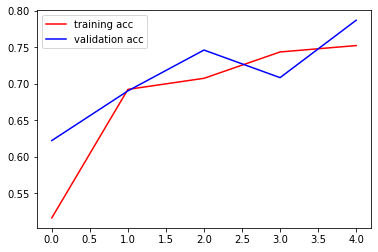

In [37]:
plt.plot(epochs,acc,"r",label="training acc")
plt.plot(epochs,val_acc,"b",label="validation acc")
plt.legend(loc=0)
plt.show()

In [38]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

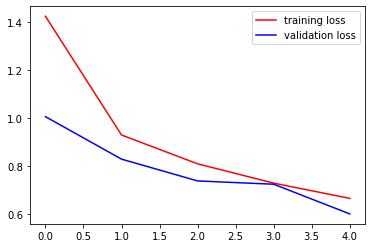

In [39]:
plt.plot(epochs,loss,"r",label="training loss")
plt.plot(epochs,val_loss,"b",label="validation loss")
plt.legend(loc=0)
plt.show()

In [40]:
history = final_model.fit(train_generator,
                          epochs=2,
                          steps_per_epoch = 3000//32,
                          validation_data = test_generator,
                          validation_steps = 662//32,
                          verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 93 steps, validate for 20.6875 steps
Epoch 1/2
93/93 [==============================] - 469s 5s/step - loss: 0.6347 - accuracy: 0.7732 - val_loss: 0.6315 - val_accuracy: 0.7704
Epoch 2/2
93/93 [==============================] - 523s 6s/step - loss: 0.5826 - accuracy: 0.7837 - val_loss: 0.6518 - val_accuracy: 0.7840


In [42]:
history = final_model.fit(train_generator,
                          epochs=1,
                          steps_per_epoch = 3000//32,
                          validation_data = test_generator,
                          validation_steps = 662/32,
                          verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 93 steps, validate for 20.6875 steps
93/93 [==============================] - 469s 5s/step - loss: 0.5293 - accuracy: 0.8100 - val_loss: 0.6508 - val_accuracy: 0.7779


## Prediction upon unseen data along with ploting images with their labels

In [10]:
final_model.load_weights("Model Weights/2019_1.h5")

In [84]:
testing = "TEST_CLAHE/"

In [94]:
testing_datagen = ImageDataGenerator(rescale=1./255.)

In [108]:
testing_generator = testing_datagen.flow_from_directory(testing, target_size=(100,100), shuffle=True, class_mode="categorical")

Found 18 images belonging to 1 classes.


In [109]:
x,y = testing_generator.next()

In [110]:
predict = final_model.predict(x)

In [111]:
predictions = np.argmax(predict, axis=1)

In [112]:
predictions

array([3, 1, 1, 3, 1, 1, 3, 2, 1, 2, 2, 2, 1, 2, 3, 1, 3, 2], dtype=int64)

In [92]:
arr = ["No_DR","Mild","Moderate","Severe","Proliferative"]

Mild


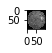

Severe


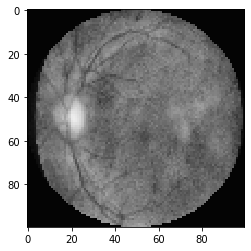

Severe


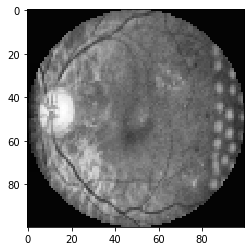

Mild


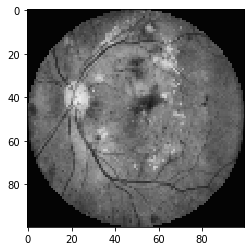

Moderate


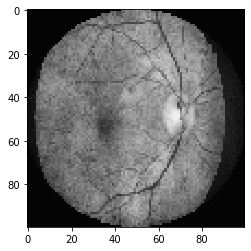

Mild


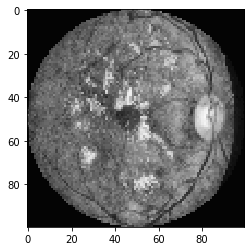

Mild


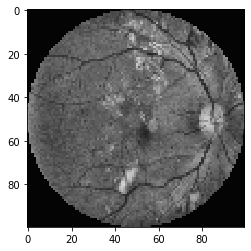

Moderate


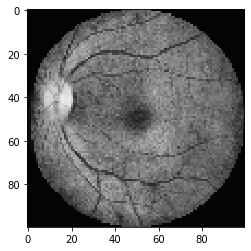

Severe


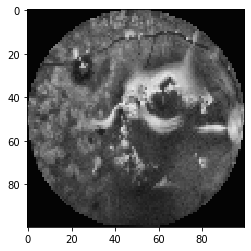

Severe


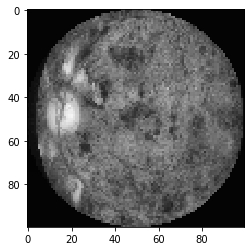

Mild


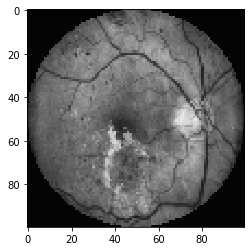

Moderate


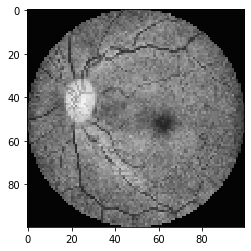

Severe


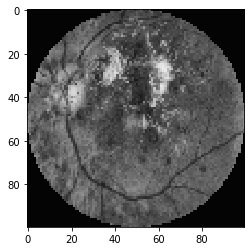

Moderate


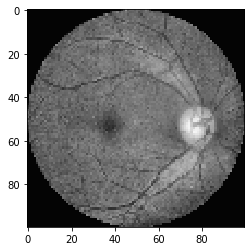

Mild


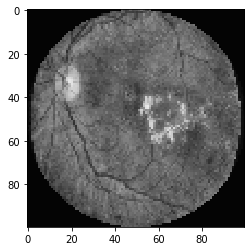

Moderate


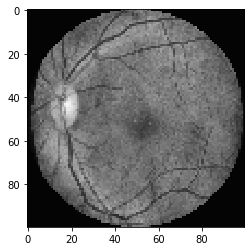

Moderate


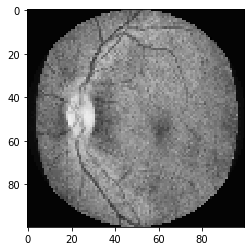

Mild


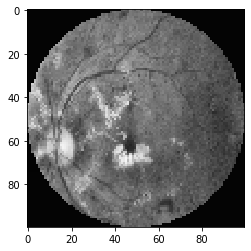

In [93]:
fig = plt.figure()
for i in range(len(x)):
    print(arr[predictions[i]])
    fig.add_subplot(10,2,i+1)
    plt.imshow(x[i])
    plt.show()